In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
SEED =42
SAMPLE_SIZE = 100

In [10]:
np.random.seed(SEED)

In [11]:
# Data generation 
def data_generate(sample_size):
    """Genenrate data for linear regression"""
    X = np.array(range(sample_size))
    random_noise = np.random.uniform(-40,40,size=sample_size)
    y = 6.8*X + random_noise
    return X,y

In [12]:
X,y = data_generate(SAMPLE_SIZE)
data = np.vstack([X,y]).T
data.shape

(100, 2)

In [13]:
data[:5]

array([[  0.        , -10.03679049],
       [  1.        ,  42.85714451],
       [  2.        ,  32.15951534],
       [  3.        ,  28.29267874],
       [  4.        ,  -0.31850876]])

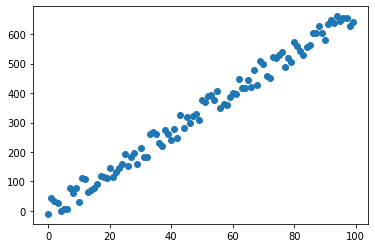

In [14]:
#lets see data
plt.scatter(data[:,0],data[:,1])
plt.show()

In [15]:
# we need to split data into train, test and validate
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [16]:
# shuffle the data
np.random.shuffle(data)
data[:5]

array([[ 33.        , 260.31084298],
       [  6.        ,   5.44668897],
       [ 90.        , 581.56753968],
       [ 85.        , 564.01466576],
       [ 13.        ,  65.38712885]])

In [17]:
train_data = data[:int(len(data)*TRAIN_SIZE)]
val_data = data[int(len(data)*TRAIN_SIZE):int(len(data)*(TRAIN_SIZE+VAL_SIZE))]
test_data = data[int(len(data)*(TRAIN_SIZE+VAL_SIZE)):]
print(train_data.shape,val_data.shape,test_data.shape)

(70, 2) (15, 2) (15, 2)


In [18]:
X_train = train_data[:,0].reshape(-1,1)
y_train = train_data[:,1].reshape(-1,1)
X_val = val_data[:,0].reshape(-1,1)
y_val = val_data[:1].reshape(-1,1)
X_test = test_data[:,0].reshape(-1,1)
y_test = test_data[:,1].reshape(-1,1)

In [19]:
# standardize data
# z=(xi-x_mean)/sd
def standardize_data(data,mean,std):
    return(data-mean)/std

In [20]:
# get mean and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
# y_mean = np.mean(y_train)
# y_std = np.std(y_train)

In [21]:
X_train = standardize_data(X_train,X_mean,X_std)
X_test = standardize_data(X_test,X_mean,X_std)
X_val = standardize_data(X_val,X_mean,X_std)

In [22]:
print(f"X_train_mean: {np.mean(X_test)} X_test_mean: {np.mean(X_test)} X_val_mean: {np.mean(X_val)}")

X_train_mean: -0.09436795375604566 X_test_mean: -0.09436795375604566 X_val_mean: -0.10121329755182101


In [23]:
# We know y=XW+b
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

In [24]:
# initialize random weights
W = 0.001*np.random.randn(input_dim,output_dim)
b = np.zeros((1,1))
print(f"W: {W.shape}\nb: {b.shape}")


W: (1, 1)
b: (1, 1)


In [25]:
y_pred = X_train.dot(W)+b
print(f'y_pred: {y_pred.shape}')

y_pred: (70, 1)


In [26]:
num_epochs = 100
lr =0.01
N = len(y_train)
for i in range(num_epochs):
    
    #forward pass
    y_pred = X_train.dot(W)+b
    
    # loss
    loss = np.sum((y_train-y_pred)**2)/N
    
    if i%10==0:
        print(f' Epoch: {i}, loss: {loss:.3f}')
    
    # backprop get dW and db
    dW = -(2/N)*np.sum((y_train-y_pred)*X_train)
    db = -(2/N)*np.sum((y_train-y_pred))
    
    # update weights
    W += -lr*dW
    b += -lr*db

 Epoch: 0, loss: 156534.784
 Epoch: 10, loss: 104689.949
 Epoch: 20, loss: 70077.924
 Epoch: 30, loss: 46970.661
 Epoch: 40, loss: 31544.067
 Epoch: 50, loss: 21245.150
 Epoch: 60, loss: 14369.512
 Epoch: 70, loss: 9779.280
 Epoch: 80, loss: 6714.805
 Epoch: 90, loss: 4668.937


In [27]:
# predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [28]:
# Train and Test MSE
train_mse = np.mean((y_train-pred_train)**2) 
test_mse = np.mean((y_test - pred_test)**2)
print(f'train_MSE: {train_mse} \ntest_MSE: {test_mse}')

train_MSE: 3303.099390558002 
test_MSE: 2907.0815817918747


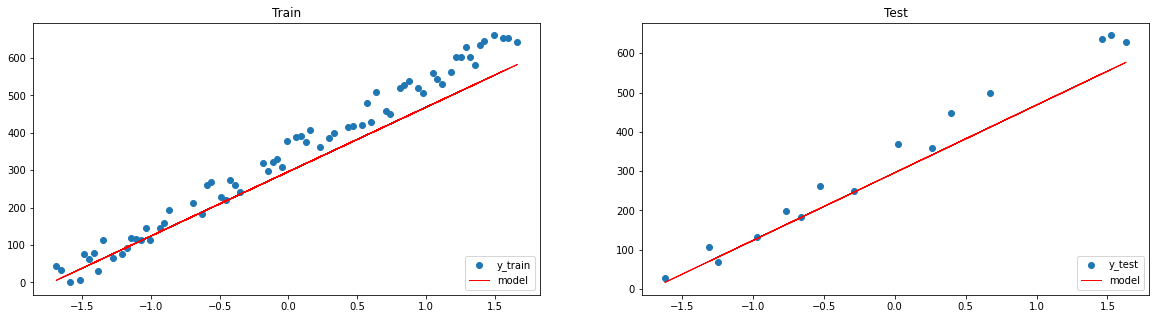

In [29]:
plt.figure(figsize = (20,5))

# plot train data
plt.subplot(1,2,1)
plt.title('Train')
plt.scatter(X_train,y_train,label = "y_train")
plt.plot(X_train,pred_train,color = 'red',linewidth=1,linestyle ='-',label = 'model')
plt.legend(loc='lower right')

# plot test data
plt.subplot(1,2,2)
plt.title("Test")
plt.scatter(X_test,y_test,label = 'y_test')
plt.plot(X_test,pred_test,color = 'red',linewidth=1,linestyle='-',label = 'model')
plt.legend(loc='lower right')
plt.show()

In [30]:
# If we train further with more epochs it will converged to a better loss value


In [31]:
# Get the closedform solution
# get the objective function as sum(y-yhat)**2 , yhat = ax+b and get the deravitive to 0 for a and b for closed form solution
#  we can use dot product here also but use for loop for demonstrain purposes
denominator = sum([i*i for i in X_train])-sum(X_train)**2/len(X_train)
a = ((sum([i*j for i,j in zip(X_train,y_train)])-sum(y_train)*sum(X_train)/len(y_train)))/denominator
b_ = ((sum(y_train)/len(y_train))*sum([x*x for x in X_train])-sum(X_train)/len(X_train)*sum([x*y for x,y in zip(X_train,y_train)]))/denominator
yhat_train_ = [a*x+b_ for x in X_train]
yhat_test_ = [a*x+b_ for x in X_test]


In [32]:
train_mse_ = np.mean((y_train-yhat_train_)**2)
test_mse_ = np.mean((y_test-yhat_test_)**2)
print(f'train_mse_: {train_mse_}')
print(f'train_mse_: {test_mse_}')

train_mse_: 559.8200615024416
train_mse_: 587.217281524412


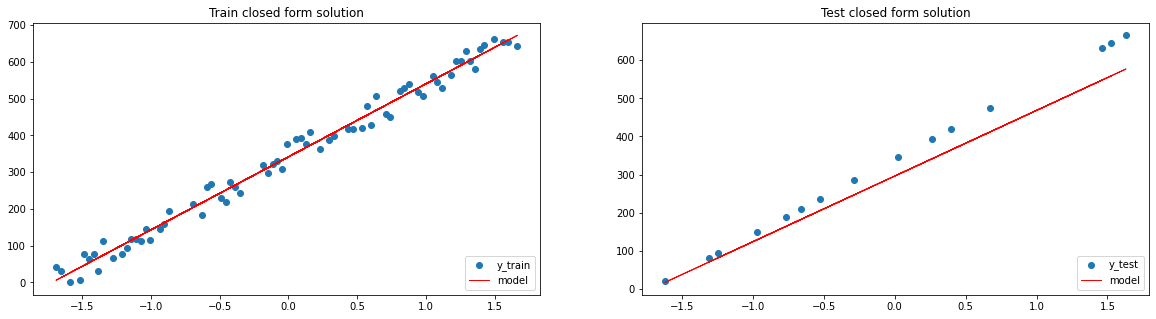

In [33]:
plt.figure(figsize = (20,5))

# plot train data
plt.subplot(1,2,1)
plt.title('Train closed form solution')
plt.scatter(X_train,y_train,label = "y_train")
plt.plot(X_train,yhat_train_,color = 'red',linewidth=1,linestyle ='-',label = 'model')
plt.legend(loc='lower right')

# plot test data
plt.subplot(1,2,2)
plt.title("Test closed form solution")
plt.scatter(X_test,yhat_test_,label = 'y_test')
plt.plot(X_test,pred_test,color = 'red',linewidth=1,linestyle='-',label = 'model')
plt.legend(loc='lower right')
plt.show()